## Documentazione della fonte

Il Database scelto è stato scaricato da keggle e tiene traccia delle emissioni per paese, specificando le fonti(item), i tipi di emissioni (Element) e le emissioni totali di gas in chilotoni dal 2000 al 2020.

In [224]:
 #importazioni librerie
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

import pycountry

In [225]:
#salvataggio dataset
df = pd.read_csv(r'Emissions.csv')
df.head(10)

,Area,Item,Element,Unit,2000,2001,2002,2003,2004,2005,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Afghanistan,Crop Residues,Direct emissions (N2O),kilotonnes,0.5200,0.5267,0.8200,0.9988,0.8225,1.1821,...,1.0321,1.3726,1.4018,1.4584,1.2424,1.1940,1.0617,0.8988,1.2176,1.3170
1,Afghanistan,Crop Residues,Indirect emissions (N2O),kilotonnes,0.1170,0.1185,0.1845,0.2247,0.1851,0.2660,...,0.2322,0.3088,0.3154,0.3281,0.2795,0.2687,0.2389,0.2022,0.2740,0.2963
2,Afghanistan,Crop Residues,Emissions (N2O),kilotonnes,0.6370,0.6452,1.0045,1.2235,1.0075,1.4481,...,1.2643,1.6815,1.7173,1.7865,1.5220,1.4627,1.3005,1.1011,1.4916,1.6133
3,Afghanistan,Crop Residues,Emissions (CO2eq) from N2O (AR5),kilotonnes,168.8070,170.9884,266.1975,324.2195,266.9995,383.7498,...,335.0379,445.5958,455.0727,473.4174,403.3181,387.6130,344.6447,291.7838,395.2689,427.5284
4,Afghanistan,Crop Residues,Emissions (CO2eq) (AR5),kilotonnes,168.8070,170.9884,266.1975,324.2195,266.9995,383.7498,...,335.0379,445.5958,455.0727,473.4174,403.3181,387.6130,344.6447,291.7838,395.2689,427.5284
5,Afghanistan,Rice Cultivation,Emissions (CH4),kilotonnes,18.2000,16.9400,18.9000,20.3000,27.3000,22.4000,...,29.4000,28.7000,28.7000,30.8000,22.9600,16.6600,15.3233,16.4555,17.8542,20.6577
6,Afghanistan,Rice Cultivation,Emissions (CO2eq) from CH4 (AR5),kilotonnes,509.6000,474.3200,529.2000,568.4000,764.4000,627.2000,...,823.2000,803.6000,803.6000,862.4000,642.8800,466.4800,429.0518,460.7529,499.9176,578.4156
7,Afghanistan,Rice Cultivation,Emissions (CO2eq) (AR5),kilotonnes,509.6000,474.3200,529.2000,568.4000,764.4000,627.2000,...,823.2000,803.6000,803.6000,862.4000,642.8800,466.4800,429.0518,460.7529,499.9176,578.4156
8,Afghanistan,Burning - Crop residues,Emissions (CH4),kilotonnes,2.6471,2.3205,2.3553,3.4017,3.0089,3.4752,...,3.2219,3.4035,3.4506,3.5413,2.9452,3.0734,2.7997,2.1390,2.9693,3.4826
9,Afghanistan,Burning - Crop residues,Emissions (CH4),kilotonnes,NaN,NaN,NaN,NaN,NaN,10.0700,...,NaN,NaN,5.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [226]:
#stampa delle informazioni (colonne, tipi di dati...) 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58765 entries, 0 to 58764
Data columns (total 25 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Area     58765 non-null  object 
 1   Item     58765 non-null  object 
 2   Element  58765 non-null  object 
 3   Unit     58765 non-null  object 
 4   2000     55577 non-null  float64
 5   2001     54038 non-null  float64
 6   2002     54137 non-null  float64
 7   2003     54158 non-null  float64
 8   2004     54163 non-null  float64
 9   2005     54431 non-null  float64
 10  2006     54473 non-null  float64
 11  2007     54315 non-null  float64
 12  2008     54296 non-null  float64
 13  2009     54283 non-null  float64
 14  2010     54714 non-null  float64
 15  2011     54136 non-null  float64
 16  2012     54614 non-null  float64
 17  2013     54501 non-null  float64
 18  2014     54379 non-null  float64
 19  2015     54289 non-null  float64
 20  2016     54252 non-null  float64
 21  2017     540

In [227]:
#e gli eventuali valori nulli
df.isnull().sum()

Area          0
Item          0
Element       0
Unit          0
2000       3188
2001       4727
2002       4628
2003       4607
2004       4602
2005       4334
2006       4292
2007       4450
2008       4469
2009       4482
2010       4051
2011       4629
2012       4151
2013       4264
2014       4386
2015       4476
2016       4513
2017       4689
2018       4741
2019       4777
2020       5094
dtype: int64

In [228]:
#elenco dei gas serra emessi
pd.DataFrame(df['Element'].unique().tolist())

,0
0,Direct emissions (N2O)
1,Indirect emissions (N2O)
2,Emissions (N2O)
3,Emissions (CO2eq) from N2O (AR5)
4,Emissions (CO2eq) (AR5)
5,Emissions (CH4)
6,Emissions (CO2eq) from CH4 (AR5)
7,Emissions (CO2)
8,Emissions (CO2eq) from F-gases (AR5)


## Ridimensionamento del df

In [229]:
#eliminazione dei valori nulli o non utili
df=df.dropna()

In [230]:
#eliminazione delle Aree che non sono paesi validi
#lista di tutti i nomi dei paesi usando libreria pycountry
nomi_paesi = [country.name for country in pycountry.countries]

# Filtro il Df per includere solo le righe con nomi paesi validi
df = df[df['Area'].isin(nomi_paesi)]


In [231]:
#elimino elementi in Item che compromettono le analisi
df=df.drop(df[df['Item']== 'All sectors with LULUCF'].index)
df=df.drop(df[df['Item']== 'All sectors without LULUCF'].index)


In [232]:
#elimino elementi in Element che compromettono le analisi
df=df.drop(df[df['Element']== 'Emissions (CO2eq) (AR5)'].index)

In [233]:
#modifica dei tipi di dati
df['Area']=df['Area'].astype(str)
df['Item']=df['Item'].astype(str)
df['Element']=df['Element'].astype(str)
df['Unit']=df['Unit'].astype(str)


In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29798 entries, 0 to 50649
Data columns (total 25 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Area     29798 non-null  object 
 1   Item     29798 non-null  object 
 2   Element  29798 non-null  object 
 3   Unit     29798 non-null  object 
 4   2000     29798 non-null  float64
 5   2001     29798 non-null  float64
 6   2002     29798 non-null  float64
 7   2003     29798 non-null  float64
 8   2004     29798 non-null  float64
 9   2005     29798 non-null  float64
 10  2006     29798 non-null  float64
 11  2007     29798 non-null  float64
 12  2008     29798 non-null  float64
 13  2009     29798 non-null  float64
 14  2010     29798 non-null  float64
 15  2011     29798 non-null  float64
 16  2012     29798 non-null  float64
 17  2013     29798 non-null  float64
 18  2014     29798 non-null  float64
 19  2015     29798 non-null  float64
 20  2016     29798 non-null  float64
 21  2017     297

In [235]:
#creo colonna Anno per facilitare l'analisi
df = pd.melt(df,
             id_vars=['Area', 'Item', 'Element', 'Unit'],
             value_vars=list(map(str, np.arange(2000, 2021))),
             var_name='Year',
             value_name='Value')


In [236]:
#conto eventuali valori nulli
df.isnull().sum()

Area       0
Item       0
Element    0
Unit       0
Year       0
Value      0
dtype: int64

In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625758 entries, 0 to 625757
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Area     625758 non-null  object 
 1   Item     625758 non-null  object 
 2   Element  625758 non-null  object 
 3   Unit     625758 non-null  object 
 4   Year     625758 non-null  object 
 5   Value    625758 non-null  float64
dtypes: float64(1), object(5)
memory usage: 28.6+ MB


In [238]:
df.head()

,Area,Item,Element,Unit,Year,Value
0,Afghanistan,Crop Residues,Direct emissions (N2O),kilotonnes,2000,0.520
1,Afghanistan,Crop Residues,Indirect emissions (N2O),kilotonnes,2000,0.117
2,Afghanistan,Crop Residues,Emissions (N2O),kilotonnes,2000,0.637
3,Afghanistan,Crop Residues,Emissions (CO2eq) from N2O (AR5),kilotonnes,2000,168.807
4,Afghanistan,Rice Cultivation,Emissions (CH4),kilotonnes,2000,18.200


# Analisi Tendenze temporali

Esaminiamo il totale delle emissioni di gas serra nel periodo dal 2000 al 2020

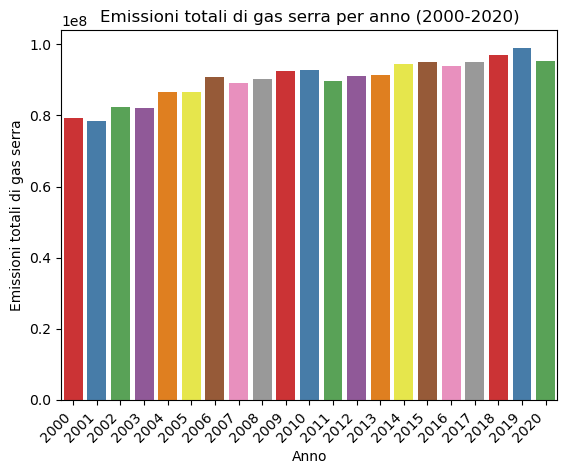

In [239]:
# Converto la colonna 'Year' in formato numerico
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Calcolo le emissioni totali per ogni anno
df_total_emissions = df.groupby('Year')['Value'].sum().reset_index()

sns.barplot(x='Year', y='Value', data=df_total_emissions, palette='Set1')
plt.xticks(rotation=45, ha='right')
plt.title('Emissioni totali di gas serra per anno (2000-2020)')
plt.xlabel('Anno')
plt.ylabel('Emissioni totali di gas serra')
plt.show()

## Principali contributori delle emissioni totali

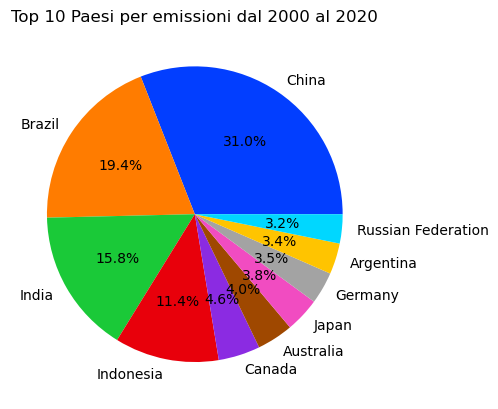

In [240]:
df = df[(df['Year'] >= 2000) & (df['Year'] <= 2020)]

# Raggruppo i dati per paese e calcolo la somma totale delle emissioni per ogni paese
grouped = df.groupby('Area')['Value'].sum()

#ordino 
top_countries = grouped.sort_values(ascending=False).head(10)

colors= sns.color_palette('bright')
plt.pie(top_countries, labels=top_countries.index, autopct='%1.1f%%', colors=colors)
plt.title('Top 10 Paesi per emissioni dal 2000 al 2020')
plt.show()

## Confronto tra Fonti di Emissione

Identifico le fonti principali delle emissioni di gas serra

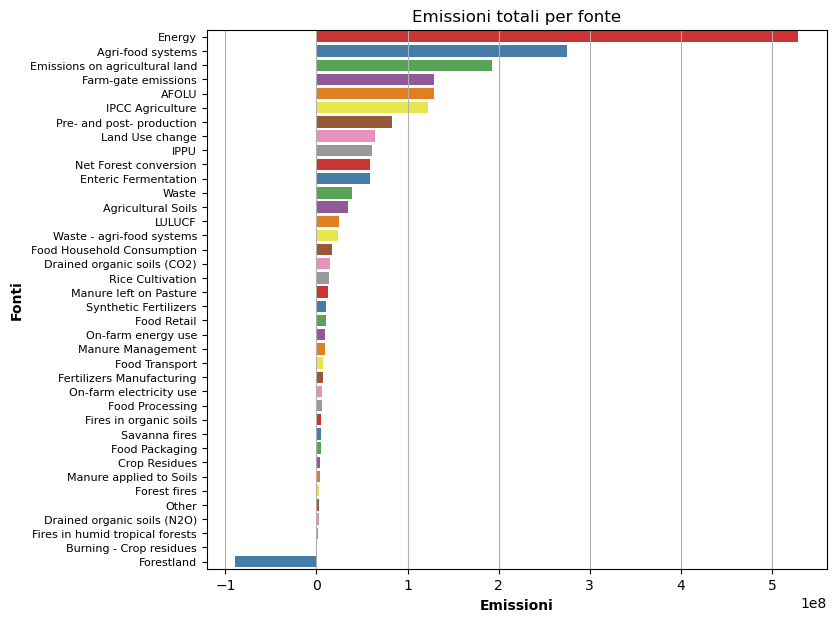

In [249]:
#creazione database con fonti e somma dei valori per fonti
df_agg = df[['Item','Value']].groupby(by=['Item']).sum().reset_index().sort_values(by='Value', ascending=False)

plt.figure(figsize=(8,7))

ax = sns.barplot(data=df_agg, x='Value', y='Item', palette=sns.color_palette("Set1"))
ax.xaxis.grid()
ax.set_ylabel('Fonti', weight='bold')
ax.set_xlabel('Emissioni', weight='bold')
ax.set_title('Emissioni totali per fonte')

plt.yticks(fontsize=8)

plt.show()

## Concentrazione di Emissioni per Tipo

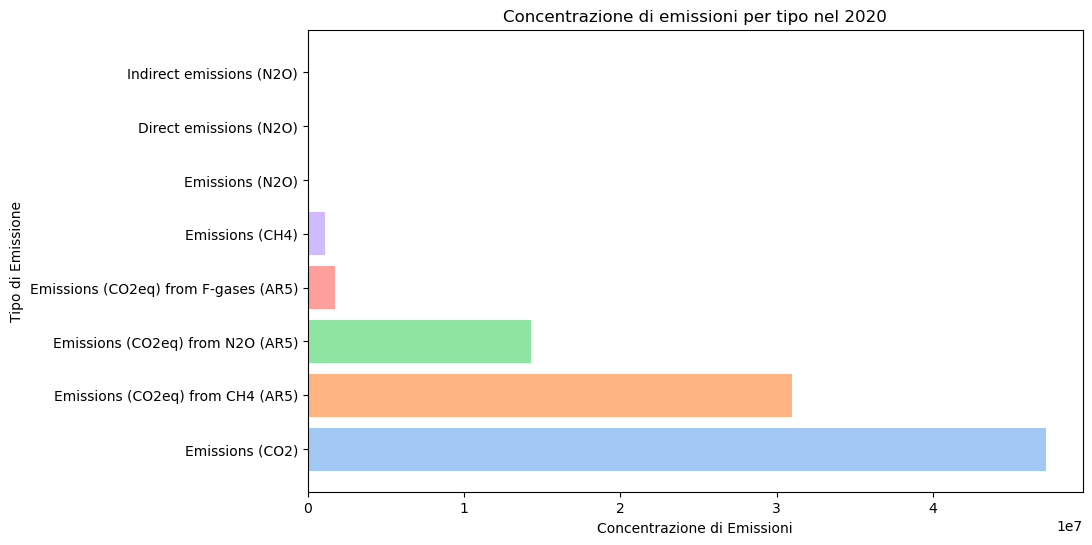

In [250]:
# Filtro i dati solo per l'anno 2020
df_2020 = df[df['Year'] == 2020]

# Calcolo il totale delle emissioni per tipo di emissione (Element) nel 2020
concentration_by_element = df_2020.groupby('Element')['Value'].sum().reset_index()

# Ordino
top_elements = concentration_by_element.sort_values(by='Value', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(top_elements['Element'], top_elements['Value'], color=sns.color_palette('pastel'))
plt.xlabel('Concentrazione di Emissioni')
plt.ylabel('Tipo di Emissione')
plt.title('Concentrazione di emissioni per tipo nel 2020')


plt.show()

##  Variazione Annuale per Paese 

Calcolo la variazione annuale dal 2000 al 2020 per i 10 paesi con variazioni più significative

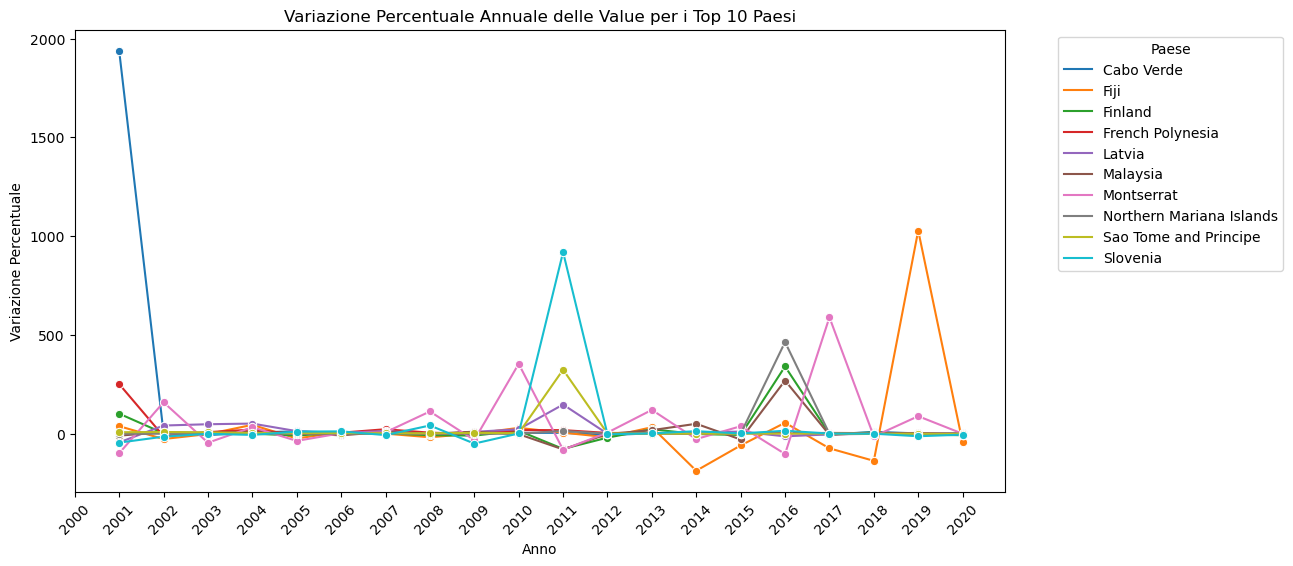

In [251]:
grouped_df = df.groupby(['Area', 'Year'])['Value'].sum().reset_index()
grouped_df['Variazione_Percentuale'] = grouped_df.groupby('Area')['Value'].pct_change() * 100
grouped_df_filtered = grouped_df.dropna(subset=['Variazione_Percentuale'])

#ordino i paesi in base alla variazione
top_countries = grouped_df.groupby('Area')['Variazione_Percentuale'].mean().sort_values(ascending=False).head(10)
#filtro e prendo solo i primi 10 paesi 
grouped_top_countries = grouped_df[grouped_df['Area'].isin(top_countries.index)]


plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Variazione_Percentuale', hue='Area', data=grouped_top_countries, marker='o')

plt.title('Variazione Percentuale Annuale delle Value per i Top 10 Paesi')
plt.xlabel('Anno')
plt.ylabel('Variazione Percentuale')

plt.legend(title='Paese', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(np.arange(grouped_top_countries['Year'].min(), grouped_top_countries['Year'].max() + 1, 1), rotation=45)

plt.show()

## Impatto Settoriale

Analizzo la distribuzione delle emissioni per i diversi settori nel 2020. Nel grafico possiamo visualizzare i 10 settori con emissioni più alte.

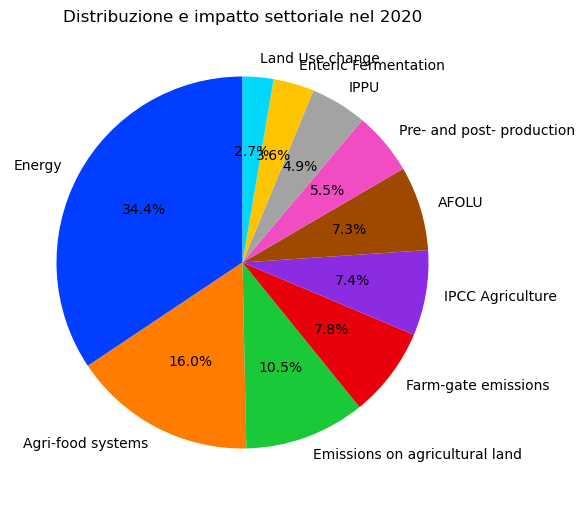

In [252]:
df_agg = df_2020[['Item', 'Value']].groupby(by=['Item']).sum().reset_index().sort_values(by='Value', ascending=False)

top_10_items = df_agg.head(10)

total_percentage = top_10_items['Value'].sum()

top_10_items = top_10_items.copy()
top_10_items['Percentage'] = (top_10_items['Value'] / total_percentage) * 100

top_10_items = top_10_items.sort_values(by='Percentage', ascending=False)


plt.figure(figsize=(6, 8))
plt.pie(top_10_items['Percentage'], labels=top_10_items['Item'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette("bright"))
plt.title('Distribuzione e impatto settoriale nel 2020')
plt.show()

 ## Confronto tra Paesi

### Confronto tra il paese con emissioni maggiori (Cina) e emissioni minori (Bhutan)

In [253]:
grouped = df.groupby('Area')['Value'].sum()

#trovo il paese con maggiori emissioni
top_countries = grouped.sort_values(ascending=False).head(1)
#trovo il paese con minori emissioni
bottom_countries = grouped.sort_values(ascending=True).head(1)
print(top_countries,bottom_countries)


Area
China    3.373573e+08
Name: Value, dtype: float64 Area
Bhutan   -128771.858
Name: Value, dtype: float64


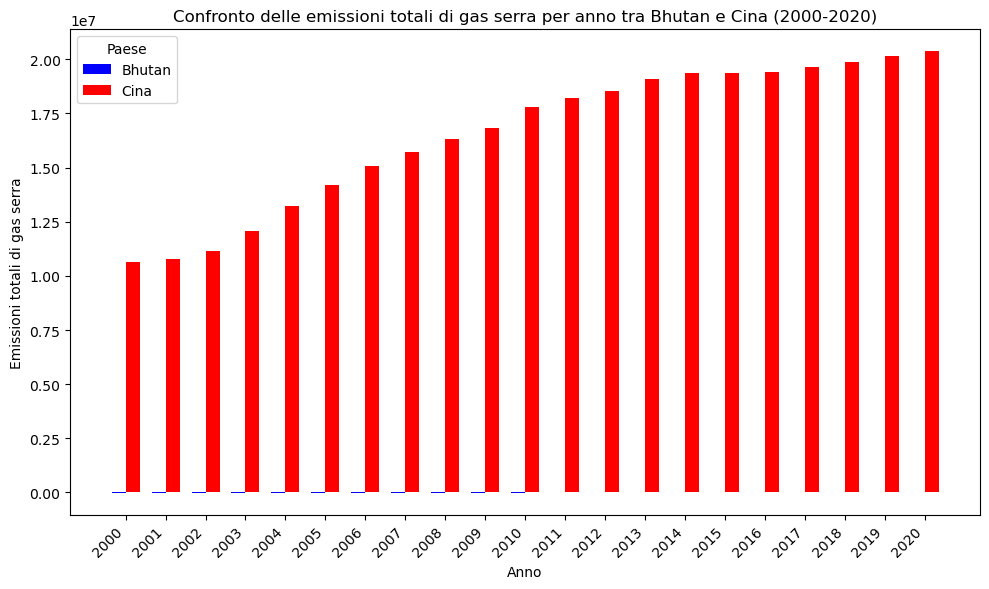

In [246]:
#Istogramma di confronto tra emissioni totali negli anni tra Cina e Bhutan

df_total_emissions_top = df_top_country.groupby('Year')['Value'].sum().reset_index()
df_total_emissions_top.rename(columns={'Value': 'Emissioni Cina'}, inplace=True)

df_total_emissions_bottom = df_bottom_country.groupby('Year')['Value'].sum().reset_index()
df_total_emissions_bottom.rename(columns={'Value': 'Emissioni Bhutan'}, inplace=True)

df_combined = pd.merge(df_total_emissions_bottom, df_total_emissions_top, on='Year')

plt.figure(figsize=(10,6))

index = df_combined['Year']

plt.bar(index - bar_width/2, df_combined['Emissioni Bhutan'], bar_width, color='blue', label='Bhutan')

plt.bar(index + bar_width/2, df_combined['Emissioni Cina'], bar_width, color='red', label='Cina')

plt.xticks(index, rotation=45, ha='right')
plt.title('Confronto delle emissioni totali di gas serra per anno tra Bhutan e Cina (2000-2020)')
plt.xlabel('Anno')
plt.ylabel('Emissioni totali di gas serra')
plt.legend(title='Paese')
plt.tight_layout()
plt.show()

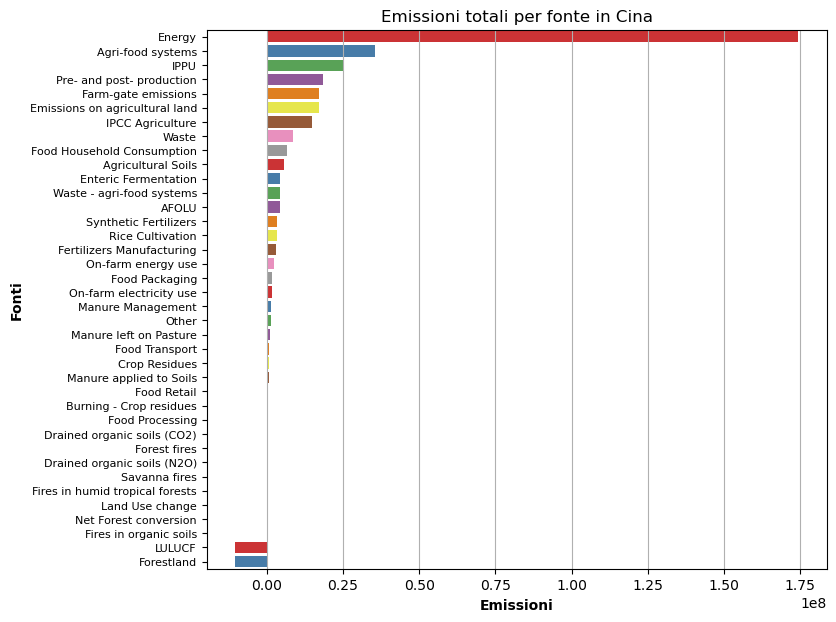

In [247]:
#Emissioni per fonte Cina
df_top_country = df[df['Area'].isin(top_countries.index)]
df_agg = df_top_country[['Item', 'Value']].groupby(by=['Item']).sum().reset_index().sort_values(by='Value', ascending=False)

plt.figure(figsize=(8,7))

ax = sns.barplot(data=df_agg, x='Value', y='Item', palette=sns.color_palette("Set1"))
ax.xaxis.grid()
ax.set_ylabel('Fonti', weight='bold')
ax.set_xlabel('Emissioni', weight='bold')
ax.set_title('Emissioni totali per fonte in Cina')

plt.yticks(fontsize=8)

plt.show()

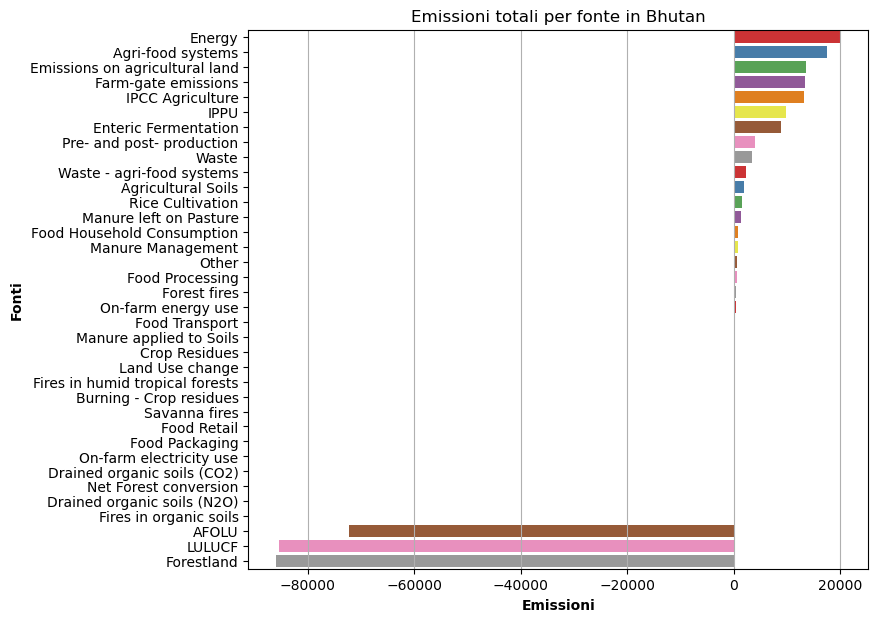

In [248]:
#Emissioni per fonte in Bhutan
df_bottom_country = df[df['Area'].isin(bottom_countries.index)]
df_agg = df_bottom_country[['Item', 'Value']].groupby(by=['Item']).sum().reset_index().sort_values(by='Value', ascending=False)

plt.figure(figsize=(8, 7))

ax = sns.barplot(data=df_agg, x='Value', y='Item', palette=sns.color_palette("Set1"))
ax.xaxis.grid()
ax.set_ylabel('Fonti', weight='bold')
ax.set_xlabel('Emissioni', weight='bold')
ax.set_title(f'Emissioni totali per fonte in Bhutan')

plt.show()


# Conclusioni

Dalle nostre analisi possiamo notare che le emissioni totali hanno avuto un generale aumento negli anni, con una diminuzione leggermente maggiore nel 2020. Dal 2000 al 2020 il Paese con maggiori emissioni in totale è stata la Cina, seguita dall’India e poi dal Brasile. Tra le principali fonti delle emissioni abbiamo: Energia, industria agro-alimentare e agricola e allevamenti industriali. 
Le maggiori emissioni sono di CO2.
Tra i paesi con le maggiori variazioni di emissioni negli anni abbiamo: Capo Verde, con una forte diminuzione dal 2001 al 2002; Slovenia, con un aumento nel 2011 seguito da una forte diminuzione nel 2012, e fiji con un aumento nel 2019 e una diminuzione nel 2020.
Confrontando le emissioni tra la Cina, il paese con maggiori emissioni nel 2020 e totalmente dal 2000 al 2020, e il Bhutan, paese con meno emissioni, possiamo notare che le maggiori emissioni in Cina e in Bhutan provengono in entrambi i casi dall’industria energetica e dall'industria agro-alimentare. Tuttavia, in Bhutan abbiamo una grande compensazione grazie all’ampia superficie occupata da foreste.
